<a href="https://colab.research.google.com/github/Nmarinsiruela/Curso-ML-Python/blob/master/NMS_6_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 6 - Clusterización con K-Means


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*

## 1. Implementando K-Means sobre Iris Dataset

---

Implementar una función ***Kmeans($x_1$, $x_2$, $k$, $dist$, $maxiter$)***  que implemente el algoritmo de clusterización K-Means sobre la primera y segunda variable del dataset Iris Setosa.

En la función implementada, se repetirán tantas iteraciones de la actualización de la posición de los centroides como indique el parámetro $maxiters$. Implementaciones más avanzadas utilizarían métodos que comprueben si el algoritmo ha convergido para decidir si dejar de iterar. Esto no es necesario en este caso. Visualizar en cada iteración la posición de los clusters y con colores señalar a cuál pertenece cada *datapoint.*

La función deberá devolver el vector de centroides actualizado y un vector de tamaño igual al número de registros de las variables de entrada (**n**), donde se indique el índice del centroide asignado a cada *datapoint.* 

**(Bonus)** Utilizar el *** Método del Codo *** (y visualizar su gráfica) para seleccionar entre un rango diferentes de valores de **K** (por ejemplo, del 1 al 15), el número de clusters óptimos.

In [0]:
import numpy   as np
import scipy   as sc
import sklearn as sk
import pandas  as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing  import scale
from sklearn.datasets       import load_iris

X = load_iris().data

The trajectory of the centroids can easily be seen


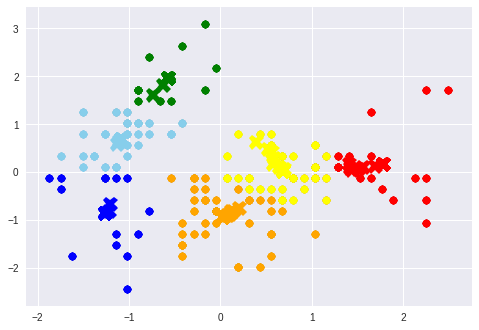

In [0]:
n, p = X.shape

# Utilizados para representación.
colors = ["blue", "green", "red", "orange", "yellow", "skyblue", "lightgreen",
          "salmon", "black", "purple", "grey"]

def visualize(centroids, values, x1, x2, k):
  # Visualiza la posición de los centroides.
  for c in range(k):
    plt.plot(centroids[c, 0], centroids[c, 1], marker="X", markersize=15, c=colors[c])
    plt.scatter(x1[values==c], x2[values==c], c=colors[c])

def evaluate_mean(x1, x2, clusters, x, centr):
  result = []
  x1_res = np.mean(x1[clusters==x]) if len(x1[clusters==x]) != 0 else centr[x,0]
  x2_res = np.mean(x2[clusters==x]) if len(x2[clusters==x]) != 0 else centr[x,1]
  return [x1_res, x2_res]
    
def Kmeans(x1, x2, k, dist, max_iters=20):
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)
  
  # Inicialización aleatoria de los centroides.
  ic    = [np.random.choice(x1.shape[0]) for i in range(k)]
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T
  values = []
  for time in range(max_iters):
    # d_p_c : Distances per centroid.
    # d_p_p : Distances per point.
  
    d_p_c = [dist((x1 - centr[x, 0]), (x2 - centr[x, 1])) for x in range(k) ]
    d_p_p = d_p_c[0]
    
    for indexes in range(1,k):
      d_p_p = np.hstack((d_p_p, d_p_c[indexes]))
    clusters = []

    for x in range(len(d_p_p)):
      clusters.append(np.argmin(d_p_p[x]))

    clusters = np.array(clusters)

    mean_clusters = []
    for x in range(k):
      mean_clusters.append(evaluate_mean(x1, x2, clusters, x, centr))

    mean_clusters = np.array(mean_clusters).reshape((k, 2))
    
    centr = mean_clusters
    values = clusters
    if max_iters == 20:
       visualize(centr, values, x1, x2, k)
    
  return centr, values
  
# ----------------------- #  


# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b : a**2 + b**2
# Cambiando K, cambiará el aspecto de la función:
k = 6
centroids, values = Kmeans(X[:, 0:1], X[:, 1:2], k, dist, 20)
    
print("The trajectory of the centroids can easily be seen")

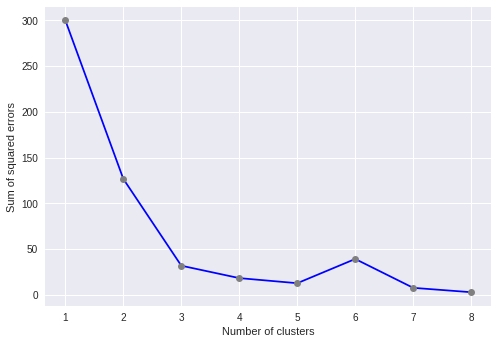

In [0]:
# BONUS: WCSS

# WCSS -> Sumatorio distancias al cuadrado entre los P1 y C1, P2 y C2, etc.

K_array = np.linspace(1,8,8)
dist = lambda a, b : a**2 + b**2
x1 = scale(X[:, 0:1], with_mean=True, with_std=True)
x2 = scale(X[:, 1:2], with_mean=True, with_std=True)
wcss = []
for k in K_array:
  k = int(k)
  centroids, values = Kmeans(X[:, 0:1], X[:, 1:2], k, dist, 19)
  d_p_c = [dist((x1[values==x] - centroids[x, 0]), (x2[values==x] - centroids[x, 1])) for x in range(k) ]
  wcss_partial = [np.sum(d_p_c[x], axis=0) for x in range(len(d_p_c))]
  wcss.append(sum(wcss_partial[0]))

plt.plot(K_array, wcss, color='blue',linestyle='solid',
         marker='o', markerfacecolor='grey')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.show()
